In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from keras import layers

In [ ]:
df = pd.read_csv("heart_2020.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Data Transformasion

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi Label Encoder
le = LabelEncoder()

# Melakukan encoding pada semua kolom bertipe object
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Menampilkan
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


# Spilit Data

In [ ]:
X = df.drop(columns=['HeartDisease'],axis=1)
y = df['HeartDisease']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1024)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1024)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

# Membuat Model

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(512, activation='relu',input_dim = 17),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               9216      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 140,801
Trainable params: 140,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
model.compile(
    optimizer='adam',
    loss= binary_crossentropy,
    metrics=['accuracy']
)

## Model traning

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
EPOCHS = 20

#
monitor_val_acc = EarlyStopping(monitor='accuracy',
                                patience=5,
                                 restore_best_weights=True)
History=model.fit( x=X_train,
          y=y_train,
          validation_data=(X_val,y_val),
          epochs=EPOCHS,
          verbose=1,
          callbacks=monitor_val_acc,
)

Epoch 1/20
5597/5597 [==============================] - 12s 2ms/step - loss: 0.2291 - accuracy: 0.9158 - val_loss: 0.2272 - val_accuracy: 0.9174
Epoch 2/20
5597/5597 [==============================] - 12s 2ms/step - loss: 0.2286 - accuracy: 0.9158 - val_loss: 0.2306 - val_accuracy: 0.9163
Epoch 3/20
5597/5597 [==============================] - 14s 3ms/step - loss: 0.2283 - accuracy: 0.9159 - val_loss: 0.2278 - val_accuracy: 0.9166
Epoch 4/20
5597/5597 [==============================] - 12s 2ms/step - loss: 0.2276 - accuracy: 0.9161 - val_loss: 0.2263 - val_accuracy: 0.9172
Epoch 5/20
5597/5597 [==============================] - 12s 2ms/step - loss: 0.2277 - accuracy: 0.9159 - val_loss: 0.2282 - val_accuracy: 0.9171
Epoch 6/20
5597/5597 [==============================] - 12s 2ms/step - loss: 0.2273 - accuracy: 0.9160 - val_loss: 0.2255 - val_accuracy: 0.9172
Epoch 7/20
5597/5597 [==============================] - 14s 3ms/step - loss: 0.2273 - accuracy: 0.9161 - val_loss: 0.2261 - val_ac

In [ ]:
best_epoch = History.history['val_accuracy'].index(max(History.history['val_accuracy'])) + 1
best_val_accuracy = max(History.history['val_accuracy'])
best_val_loss = History.history['val_loss'][best_epoch - 1]

print(f'Best epoch: {best_epoch}')
print(f'Best validation accuracy: {best_val_accuracy}')
print(f'Best validation loss: {best_val_loss}')

Best epoch: 1
Best validation accuracy: 0.9173814058303833
Best validation loss: 0.22722065448760986


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2295432984828949
Test accuracy: 0.914529025554657


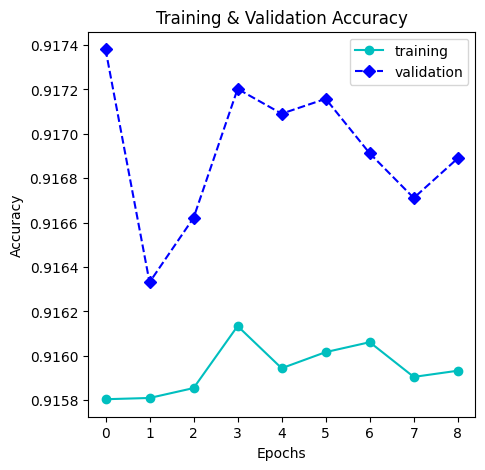

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(5,5))
plt.plot(range(len(History.history['accuracy'])),
         History.history['accuracy'],
         'co-',
         label='training')
plt.plot(range(len(History.history['val_accuracy'])),
         History.history['val_accuracy'],
         'bD--',
         label='validation')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
